In [3]:
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib as plt

In [4]:
data = pd.read_excel("2019~ 2020 테스트 검색 데이터 전국 일별.xlsx", header=0, index_col=0)
data

,moc
date,
2019-01-01,438460
2019-01-02,183397
2019-01-03,195637
2019-01-04,230425
2019-01-05,456959
...,...
2020-12-27,370376
2020-12-28,232478
2020-12-29,233149


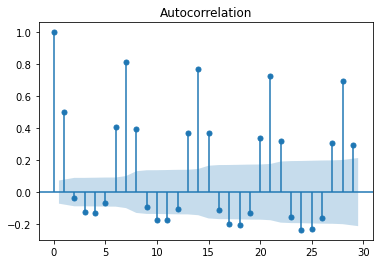

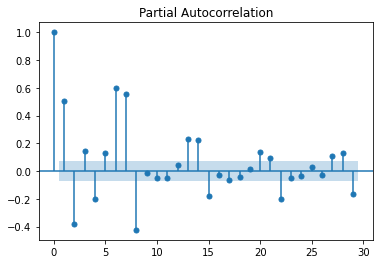

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data) # 관측치들 사이의 관련성
plot_pacf(data) # k이외의 모든 다른 시점 관측치의 영향력 배제 #eq_yt와 eq_ytk 두 관측치의 관련성을 측정
plt.show()

In [6]:
auto_arima(data)

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

<AxesSubplot:xlabel='date'>

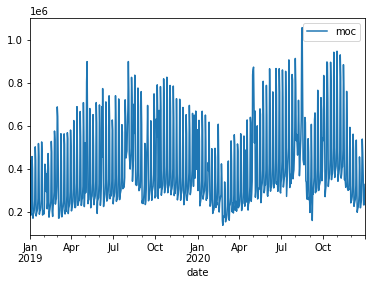

In [7]:
data.plot()

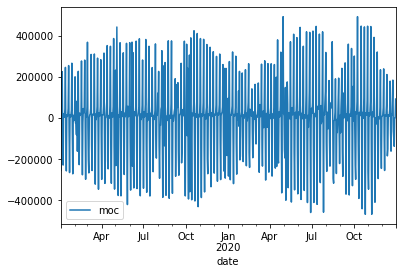

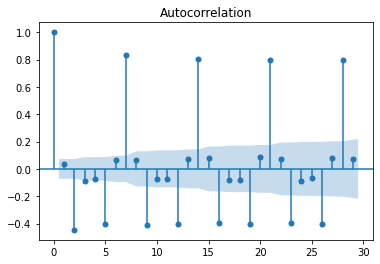

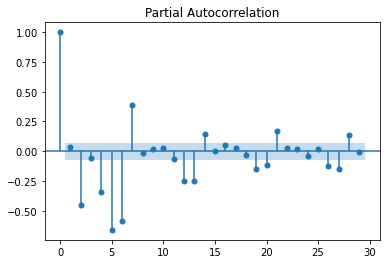

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=data.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(5,1,5))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

C:\Users\yechan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\yechan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D w

                             ARIMA Model Results                              
Dep. Variable:                  D.moc   No. Observations:                  730
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9323.382
Method:                       css-mle   S.D. of innovations          84519.779
Date:                Fri, 09 Apr 2021   AIC                          18668.763
Time:                        10:19:38   BIC                          18719.287
Sample:                    01-02-2019   HQIC                         18688.256
                         - 12-31-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.moc     1.0522      0.062     16.943      0.000       0.931       1.174
ar.L2.D.moc    -1.6459      0.050    -32.788      0.000      -1.744      -1.547
ar.L3.D.moc     1.1642      0.090     12.899    

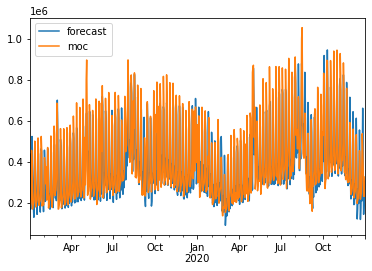

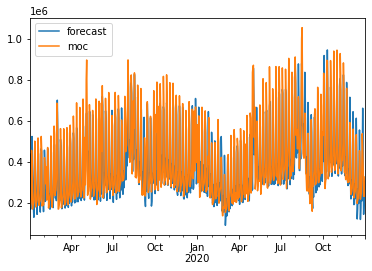

In [10]:
model_fit.plot_predict()

In [11]:
fore = model_fit.forecast(steps=100)
print(fore)

(array([423351.00383035, 598879.69586867, 457836.19930153, 197480.94843778,
       202277.73093302, 285182.85963586, 275006.67224839, 410353.55649401,
       594589.63257547, 455535.83920952, 196687.41050922, 202641.14301686,
       286063.53259754, 276090.18175163, 410839.37215963, 593706.33943828,
       454102.81598459, 196120.54800071, 203065.18615647, 286957.2214312 ,
       277169.92005135, 411317.12539337, 592820.33527186, 452675.49338059,
       195562.57027264, 203494.76545321, 287849.96876184, 278242.37274428,
       411785.98088139, 591931.46026869, 451253.83975088, 195013.43160857,
       203929.8148178 , 288741.72452371, 279307.54037023, 412245.99154427,
       591039.77873342, 449837.87970675, 194473.1003969 , 204370.27195713,
       289632.44001684, 280365.42409383, 412697.21039487, 590145.35463138,
       448427.63739632, 193941.5447992 , 204816.07475351, 290522.06699056,
       281416.02546998, 413139.69047687, 589248.25157329, 447023.13650317,
       193418.73275266, 

In [12]:
model_fit.forecast(10)

(array([423351.00383035, 598879.69586867, 457836.19930153, 197480.94843778,
        202277.73093302, 285182.85963586, 275006.67224839, 410353.55649401,
        594589.63257547, 455535.83920952]),
 array([ 84519.77863968,  93533.75220439,  96605.70790917,  98493.62749497,
         99776.15466031, 100537.37781701, 101798.25553095, 104564.43900232,
        107444.98803864, 109338.33269125]),
 array([[257695.28171528, 589006.72594542],
        [415556.91020918, 782202.48152817],
        [268492.49109856, 647179.9075045 ],
        [  4436.98584094, 390524.91103463],
        [  6720.06128292, 397835.40058312],
        [ 88133.22001442, 482232.4992573 ],
        [ 75485.75771872, 474527.58677805],
        [205411.02198583, 615296.09100218],
        [384001.3257004 , 805177.93945054],
        [241236.64500501, 669835.03341404]]))

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['moc'], model='mutiplicative')
result

In [28]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

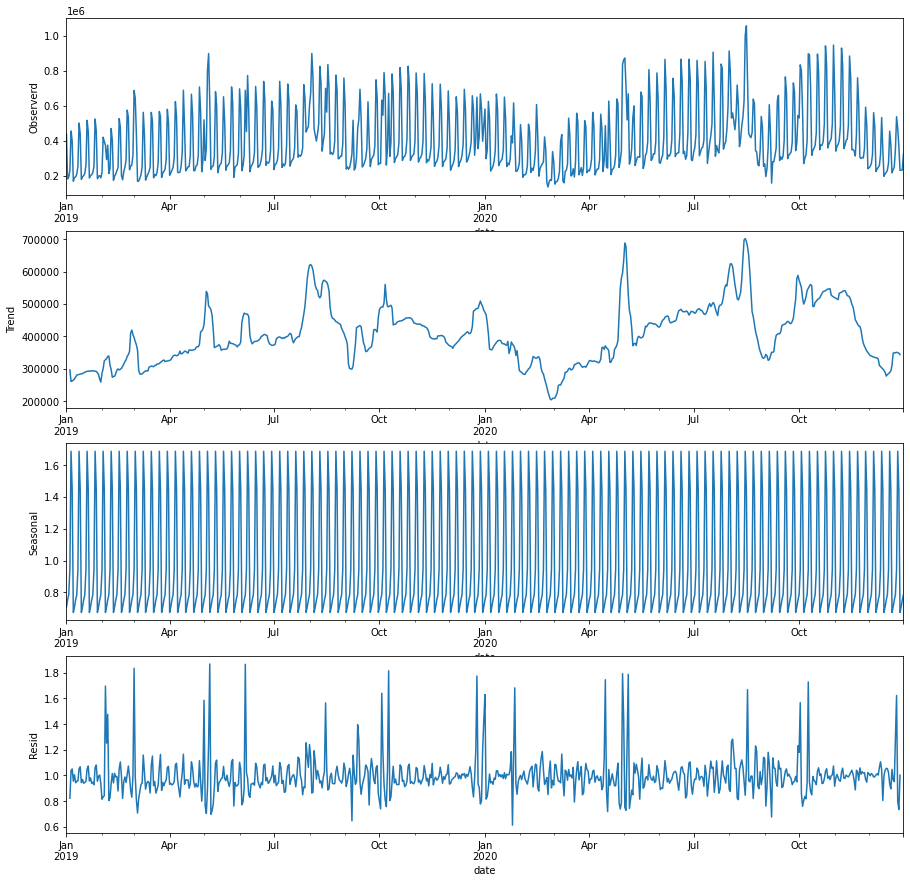

In [29]:
plot_decompose(result)